In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv('iris.csv')
snsdata = df.drop(['sepal_width'], axis=1)
df.shape

(150, 5)

In [3]:

petal_length = df['petal_length'].values
petal_width = df['petal_width'].values
sepal_length = df['sepal_length'].values

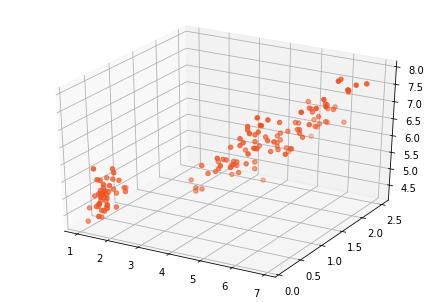

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(petal_length,petal_width,sepal_length, color='#ef5423')
plt.show()

In [5]:
n = len(petal_length)
x0 = np.ones(n)
X = np.array([x0, petal_length, petal_width]).T
B = np.array([0, 0, 0])
Y = np.array(sepal_length)
alpha = 0.0001

In [6]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [7]:
cost_function(X, Y, B)

17.412833333333335

In [8]:

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [9]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [10]:
cost_history[-1]

0.1150121617429721

In [11]:
newB

array([ 3.42528853,  0.88122025, -0.82959902])

In [12]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [13]:
Y_pred = X.dot(newB)

In [14]:

rmse(Y, Y_pred)

0.4796085106479496